In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
data = pd.read_csv('C:/Users/admin/Downloads/Data_classification.csv', header = None)

In [19]:
data.values

array([[4.85506424, 9.63996157, 1.        ],
       [8.62543976, 0.05892653, 0.        ],
       [3.82819154, 0.72319923, 0.        ],
       [7.15095484, 3.89942042, 1.        ],
       [6.47790044, 8.19818055, 1.        ],
       [1.9222695 , 1.33142726, 0.        ],
       [8.97821589, 0.99343751, 1.        ],
       [6.63560308, 8.54280268, 1.        ],
       [7.67235895, 5.41639979, 1.        ],
       [4.86601533, 2.04267129, 0.        ],
       [6.86140497, 9.65530972, 1.        ],
       [8.54042132, 2.59037423, 1.        ],
       [3.71788065, 5.38166211, 0.        ],
       [9.18129712, 0.17147465, 1.        ],
       [9.56014002, 0.02494649, 0.        ],
       [5.97136947, 4.18830187, 1.        ],
       [9.43820269, 1.94381244, 1.        ],
       [4.35755102, 9.88798331, 1.        ],
       [4.54033196, 6.71387336, 1.        ],
       [1.54910163, 9.37513216, 0.        ],
       [8.08197371, 9.84220681, 1.        ],
       [9.620465  , 2.09932754, 1.        ],
       [8.

In [20]:
true_x = []
true_y = []
false_x = []
false_y = []

In [21]:
for item in data.values:
    if item[2] == 1:
        true_x.append(item[0])
        true_y.append(item[1])
    else:
        false_x.append(item[0])
        false_y.append(item[1])
        

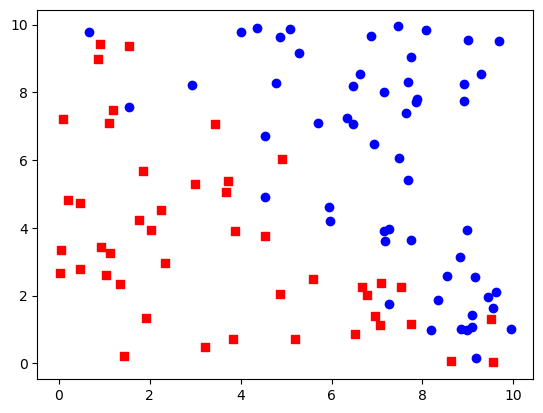

In [23]:
plt.scatter(true_x, true_y, marker='o', c='b')
plt.scatter(false_x, false_y, marker='s', c='r')
plt.show()

In [24]:
def sigmoid(z):
    return 1.0/(1+ np.exp(-z))

In [26]:
def phan_chia(p):
    if p >= 0.5:
        return 1
    else:
        return 0

In [28]:
def predict(feature, weights):
    z= np.dot(feature, weights)
    return sigmoid(z)

In [30]:
def cost_function(features, labels, weights):
    n=len(labels)
    predictions = predict(feature, weights)
    cost_class1 = -labels*np.log(predictions)
    cost_class2 = -(1-labels)*np.log(1 - predictions)
    cost = cost_class1 + cost_class2
    return cost.sum()/n

In [32]:
def update_weight(features, labels, weights, learning_rate):
    n=len(labels)
    predictions = predict(features, weights)
    gd = np.dot(features.T, (predictions - labels))
    gd = gd/n
    gd = gd*learning_rate
    weights = weights -gd
    return weights

In [34]:
def train(features, labels, weights, learning_rate, iter):
    cost_hs=[]
    for i in range(iter):
        weights = update_weight(features, labels, weights, learning_rate)
        cost = cost_function(features, labels, weights)
        cost_hs.append(cost)
        
    return weights, cost_hs